In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
import time

In [3]:
class CrashState(TypedDict):
    input: str
    step1:str
    step2: str
    step3: str
    

In [4]:
def step_1_func(state: CrashState)-> CrashState:
    print("step 1 executed")
    return {"step1":"done", "input": state["input"]}

def step_2_func(state: CrashState)-> CrashState:
    print("step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30) #Simulate long-running hang
    return {"step2":"done"}


def step_3_func(state: CrashState)-> CrashState:
    print("step 3 executed")
    return {"done":True}

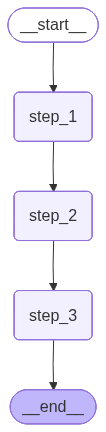

In [5]:
builder=StateGraph(CrashState)

builder.add_node('step_1', step_1_func)
builder.add_node('step_2', step_2_func)
builder.add_node('step_3', step_3_func)

builder.add_edge(START,'step_1')
builder.add_edge('step_1','step_2')
builder.add_edge('step_2','step_3')
builder.add_edge('step_3', END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
builder.compile(checkpointer=checkpointer)

In [6]:
try:
    print("Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input":"start"}, config={"configurable":{"thread_id":'thread-1'}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated).")


Running graph: Please manually interrupt during Step 2...
step 1 executed
step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
step 3 executed


In [7]:
graph.get_state({"configurable":{"thread_id":'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ec-6b60-8003-3c18c849b2c0'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-30T02:33:35.418659+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, tasks=(), interrupts=())

In [8]:
list(graph.get_state_history({"configurable":{"thread_id":'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ec-6b60-8003-3c18c849b2c0'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-30T02:33:35.418659+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-30T02:33:35.417635+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538c-3acd-6e6f-8001-9678300957d9'}}, tasks=(PregelTask(id='a0199394-b1e3-4c6a-4fe4-0dd784ad9e8

In [9]:
final_state=graph.invoke(None, config={"configurable":{"thread_id":'thread-1'}})
print("\n Final State:", final_state)


 Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [10]:
graph.get_state({"configurable":{"thread_id":'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ec-6b60-8003-3c18c849b2c0'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-30T02:33:35.418659+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, tasks=(), interrupts=())

In [11]:
list(graph.get_state_history({"configurable":{"thread_id":'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ec-6b60-8003-3c18c849b2c0'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-30T02:33:35.418659+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538d-58ea-635f-8002-dd31b088ab9a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-30T02:33:35.417635+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538c-3acd-6e6f-8001-9678300957d9'}}, tasks=(PregelTask(id='a0199394-b1e3-4c6a-4fe4-0dd784ad9e8

TIME TAVEL


In [20]:
graph.get_state({"configurable":{"thread_id":"thread-1", "checkpoint_id":"1f0b538c-3acd-6e6f-8001-9678300957d9"}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_id': '1f0b538c-3acd-6e6f-8001-9678300957d9'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-30T02:33:05.416766+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b538c-3acb-69fe-8000-6a3a1d93c3b9'}}, tasks=(PregelTask(id='cf370b0a-a8b3-9f87-df0e-01417c0da368', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result={'step2': 'done'}),), interrupts=())

In [22]:
graph.invoke(None,config={"configurable":{"thread_id":"thread-1", "checkpoint_id":"1f0b538d-58ea-635f-8002-dd31b088ab9a"}})

step 3 executed


{'input': 'start', 'step1': 'done', 'step2': 'done'}